## ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50 = ResNet50()
resnet50.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving cat1.jpg to cat1 (1).jpg


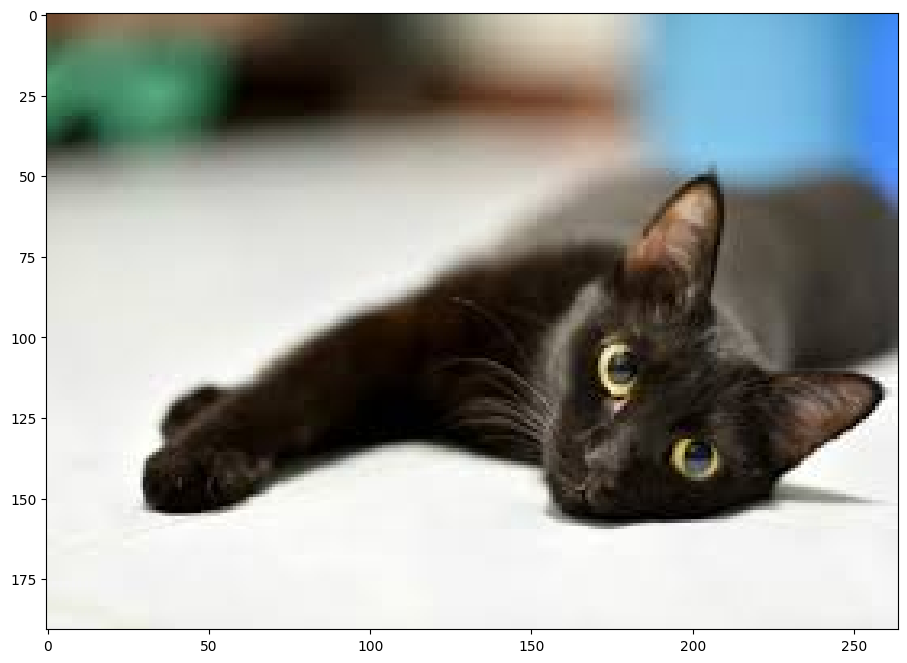

In [5]:
plt.figure(figsize=(12,8))
img = Image.open('cat1.jpg')
plt.imshow(img);

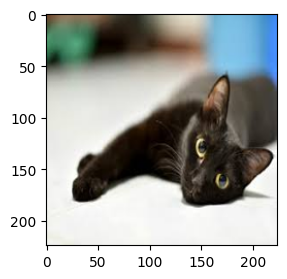

In [6]:
plt.figure(figsize=(4,3))
img = img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [7]:
yhat = resnet50.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

1/1 [==============================] - 2s 2s/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.30097106),
   ('n04074963', 'remote_control', 0.11023651),
   ('n02123597', 'Siamese_cat', 0.07813764),
   ('n04152593', 'screen', 0.038292177),
   ('n02123045', 'tabby', 0.037298754)]])

In [8]:
yhat[0,:5]

array([2.5319054e-07, 3.0013246e-06, 4.3415773e-07, 1.7158879e-06,
       2.4687788e-05], dtype=float32)